# KAN: Introduction

В данном ноутбуке представлен простейший код, демонстрирующий работу архитектуры Kolmagorov Arnold Networks

## Немного о математической формулировке теоремы

Теорема Колмогорова-Арнольда утверждает, что если 𝑓 — это многомерная непрерывная функция на ограниченной области, то её можно представить в виде конечной композиции непрерывных функций одной переменной и бинарной операции сложения. Более конкретно, для гладкой функции $f:[0,1]^n→R$


$$
f(x) = f(x_1, \dots, x_n) = \sum_{q=1}^{2n+1} \Phi_q \left( \sum_{p=1}^{n} \varphi_{q,p} (x_p) \right)
$$

где $\varphi_{q,p} : [0,1] \to \mathbb{R}$ и $\Phi_q : \mathbb{R} \to \mathbb{R}$.

В определённом смысле, они показали, что единственная по-настоящему многомерная функция — это сложение, так как любую другую функцию можно выразить с помощью одномерных функций и суммирования. Однако представление Колмогорова-Арнольда с шириной $(2n + 1)$ и глубиной 2 может быть недостаточно гладким из-за его ограниченной выразительной мощности.

Мы расширяем его выразительную силу, обобщая это представление на произвольные глубины и ширины.

## Простейшая реализация

Инициализация модели

In [1]:
from kan import *
# create model KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2, 3, 1], grid=10, k=3)

checkpoint directory created: ./model
saving model version 0.0


Создание датасета. Данные создадим на базе функции $exp^(sin(pi*x)+y^2)$


In [2]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.sin(2 * np.pi * x) * torch.exp(-x[:,[1]]**2) + torch.cos(3 * torch.pi * x[:,[1]]) * x**2
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 2]))

Визуализация KAN на этапе инициализации

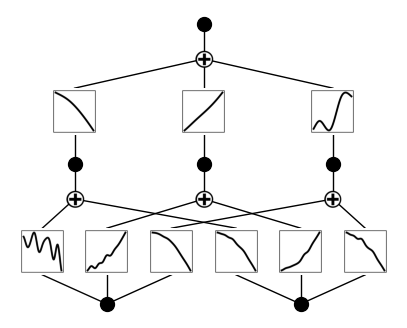

In [3]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

Обучение KAN с sparsity regularization

In [4]:
# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

| train_loss: 6.27e-01 | test_loss: 6.42e-01 | reg: 5.30e+00 | : 100%|█| 20/20 [00:13<00:00,  1.43it

saving model version 0.1


{'train_loss': [array(0.62693983, dtype=float32),
  array(0.6271115, dtype=float32),
  array(0.6271205, dtype=float32),
  array(0.6269791, dtype=float32),
  array(0.62699246, dtype=float32),
  array(0.62699085, dtype=float32),
  array(0.6269851, dtype=float32),
  array(0.62698275, dtype=float32),
  array(0.6270339, dtype=float32),
  array(0.62694436, dtype=float32),
  array(0.62694037, dtype=float32),
  array(0.6269383, dtype=float32),
  array(0.6269342, dtype=float32),
  array(0.6269328, dtype=float32),
  array(0.62692904, dtype=float32),
  array(0.6269253, dtype=float32),
  array(0.62690806, dtype=float32),
  array(0.62689364, dtype=float32),
  array(0.6267956, dtype=float32),
  array(0.62683505, dtype=float32)],
 'test_loss': [array(0.6425235, dtype=float32),
  array(0.6427057, dtype=float32),
  array(0.64266336, dtype=float32),
  array(0.64241713, dtype=float32),
  array(0.64235544, dtype=float32),
  array(0.6423545, dtype=float32),
  array(0.64235073, dtype=float32),
  array(0.642

Визуализация обученной KAN

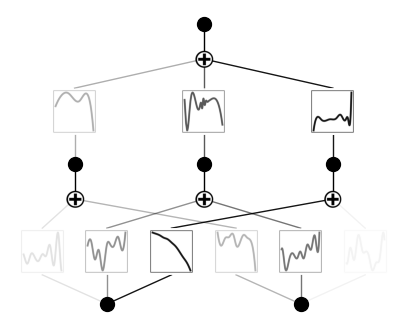

In [5]:
model.plot()

Проведение алгоритма прунинга и обновление визуализации

saving model version 0.2


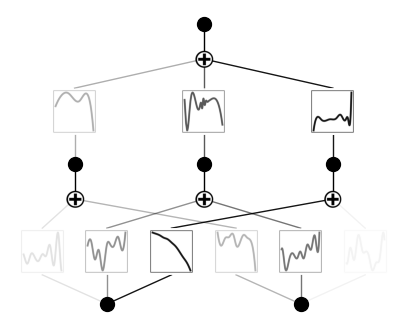

In [6]:
model.prune()
model.plot()

In [7]:
# model = model.prune()
# model(dataset['train_input'])
# model.plot()

Продолжение обучение и перерисовка графика

In [8]:
# model.fit(dataset, opt="LBFGS", steps=50);

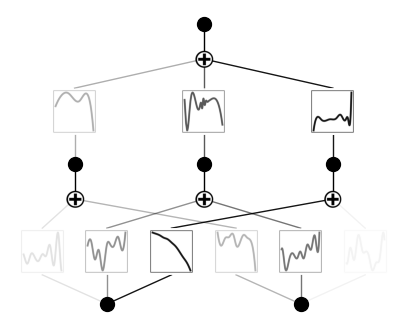

In [9]:
model.plot()

Автоматически или вручную установите символические функции активации

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.23067811131477356, c=1
fixing (0,0,1) with x, r2=0.08910958468914032, c=1
fixing (0,0,2) with exp, r2=0.9987615942955017, c=2
fixing (0,1,0) with x, r2=0.09744522720575333, c=1
fixing (0,1,1) with x, r2=0.5150937438011169, c=1
fixing (0,1,2) with x, r2=0.00363329891115427, c=1
fixing (1,0,0) with x, r2=0.0037306835874915123, c=1
fixing (1,1,0) with x, r2=0.007473766803741455, c=1
fixing (1,2,0) with x, r2=9.112617408391088e-05, c=1
saving model version 0.2


Можно продолжить обучение модели для достижения точности машинного вычисления

In [11]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 6.17e-01 | test_loss: 6.29e-01 | reg: 0.00e+00 | : 100%|█| 50/50 [00:15<00:00,  3.23it

saving model version 0.3


Вывод символической формулы которая должна быть сильно близка к исходной

In [12]:
model.symbolic_formula()[0][0]

-0.106661907771533*x_1 - 0.0534479675134186*x_2 - 0.00779266511233092*exp(3.25255370140076*x_1) + 0.0287732542838356